# Data Collection 

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1WkCyl3kFta2GwV2ZJes0ZNNFNbfBl1LE'

# YD_dataset 1WkCyl3kFta2GwV2ZJes0ZNNFNbfBl1LE
# Yawn_dataset 1LE3BHEpRuIDe-yedGriGg1Ix6_ZliEsp
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('yawn_dataset.zip')

In [2]:
!unzip yawn_dataset.zip

Archive:  yawn_dataset.zip
   creating: YD_dataset/test/
   creating: YD_dataset/test/no_yawn/
  inflating: YD_dataset/test/no_yawn/1004.jpg  
  inflating: YD_dataset/test/no_yawn/1007.jpg  
  inflating: YD_dataset/test/no_yawn/1010.jpg  
  inflating: YD_dataset/test/no_yawn/1033.jpg  
  inflating: YD_dataset/test/no_yawn/1044.jpg  
  inflating: YD_dataset/test/no_yawn/1050.jpg  
  inflating: YD_dataset/test/no_yawn/1063.jpg  
  inflating: YD_dataset/test/no_yawn/1067.jpg  
  inflating: YD_dataset/test/no_yawn/1096.jpg  
  inflating: YD_dataset/test/no_yawn/1114.jpg  
  inflating: YD_dataset/test/no_yawn/1118.jpg  
  inflating: YD_dataset/test/no_yawn/1129.jpg  
  inflating: YD_dataset/test/no_yawn/113.jpg  
  inflating: YD_dataset/test/no_yawn/1134.jpg  
  inflating: YD_dataset/test/no_yawn/115.jpg  
  inflating: YD_dataset/test/no_yawn/1213.jpg  
  inflating: YD_dataset/test/no_yawn/1267.jpg  
  inflating: YD_dataset/test/no_yawn/1268.jpg  
  inflating: YD_dataset/test/no_yawn/1323.j

# Data Augmentation

In [4]:
import numpy as  np
import pandas as pd  

train = pd.read_csv('csv_dataset.csv')
train

,image_names,yawn_or_not
0,YD_dataset/train/yawn/1.jpg,1
1,YD_dataset/train/yawn/10.jpg,1
2,YD_dataset/train/yawn/101.jpg,1
3,YD_dataset/train/yawn/103.jpg,1
4,YD_dataset/train/yawn/104.jpg,1
...,...,...
1443,YD_dataset/train/no_yawn/992.jpg,0
1444,YD_dataset/train/no_yawn/993.jpg,0
1445,YD_dataset/train/no_yawn/994.jpg,0
1446,YD_dataset/train/no_yawn/997.jpg,0


In [5]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline




train_img = []
for img_name in train['image_names']:
    # defining the image path
    image_path = '/content/' + img_name
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (224,224,3)
    img = resize(img, output_shape=(224,224,3), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

images = np.array(train_img)
images.shape

(1448, 224, 224, 3)

In [6]:
labels = train['yawn_or_not'].values
labels.shape

(1448,)

In [7]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(images,labels, test_size = 0.148, random_state = 13)
(Xtrain.shape, Ytrain.shape), (Xtest.shape, Ytest.shape)

(((1233, 224, 224, 3), (1233,)), ((215, 224, 224, 3), (215,)))

In [9]:
Ytest_bin = Ytest
Ytest_bin

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

# Building model architecture

In [10]:
import tensorflow as tf 
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D,BatchNormalization
from keras import applications
from keras.applications import VGG16
from keras.models import Model
from keras import optimizers


pretrained_model = VGG16(include_top=False, weights='imagenet')
pretrained_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [11]:
from keras.utils import to_categorical


vgg_features_train = pretrained_model.predict(Xtrain)
vgg_features_val  = pretrained_model.predict(Xtest)

train_target = to_categorical(Ytrain)
val_target = to_categorical(Ytest)

# Model Training

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(7,7,512)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

# compile the model
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2508900   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 2,509,502
Trainable params: 2,509,302
Non-trainable params: 200
_________________________________________________________________


In [13]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [14]:
training = model2.fit(vgg_features_train, train_target,callbacks=callbacks_list, epochs=50, validation_data=(vgg_features_val, val_target))

Epoch 1/50
39/39 [==============================] - 1s 13ms/step - loss: 0.7303 - accuracy: 0.6207 - val_loss: 0.9346 - val_accuracy: 0.6605

Epoch 00001: val_accuracy improved from -inf to 0.66047, saving model to model_weights.h5
Epoch 2/50
39/39 [==============================] - 0s 5ms/step - loss: 0.5005 - accuracy: 0.7296 - val_loss: 0.3543 - val_accuracy: 0.8651

Epoch 00002: val_accuracy improved from 0.66047 to 0.86512, saving model to model_weights.h5
Epoch 3/50
39/39 [==============================] - 0s 5ms/step - loss: 0.3708 - accuracy: 0.8386 - val_loss: 0.4119 - val_accuracy: 0.7674

Epoch 00003: val_accuracy did not improve from 0.86512
Epoch 4/50
39/39 [==============================] - 0s 5ms/step - loss: 0.2626 - accuracy: 0.9062 - val_loss: 0.3897 - val_accuracy: 0.7814

Epoch 00004: val_accuracy did not improve from 0.86512
Epoch 5/50
39/39 [==============================] - 0s 5ms/step - loss: 0.2052 - accuracy: 0.9359 - val_loss: 0.3533 - val_accuracy: 0.8000

E

# Model Evaluation 

In [15]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

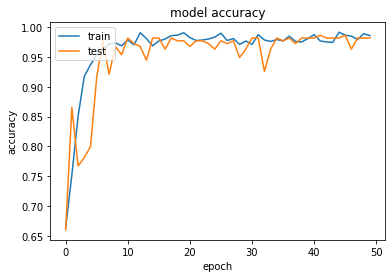

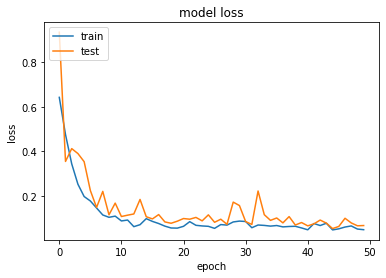

In [16]:
import matplotlib.pyplot as plt

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [17]:
result = model2.evaluate(vgg_features_val,val_target,verbose=1)

print("test loss : ",result[0])
print("test acc. :",result[1])

7/7 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9814
test loss :  0.066448874771595
test acc. : 0.9813953638076782


In [18]:
predictions= model2.predict(vgg_features_val,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

7/7 [==============================] - 0s 3ms/step


In [19]:
predicted_classes.shape

(215,)

In [20]:
val_target.shape

(215, 2)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(accuracy_score(Ytest_bin,predicted_classes))

0.9813953488372092


In [22]:
print(confusion_matrix(Ytest_bin,predicted_classes))

[[101   1]
 [  3 110]]


In [23]:
print(classification_report(Ytest_bin,predicted_classes,target_names=["yawn","no_yawn"]))

              precision    recall  f1-score   support

        yawn       0.97      0.99      0.98       102
     no_yawn       0.99      0.97      0.98       113

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



In [24]:
from sklearn.metrics import roc_curve,roc_auc_score

roc_auc_score(Ytest_bin,predicted_classes)

0.9818237029325004

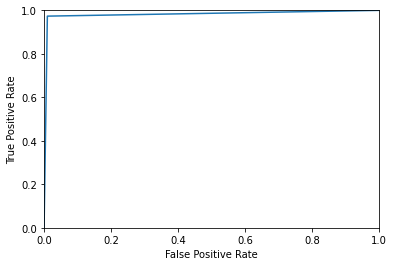

In [25]:
fpr , tpr , thresholds = roc_curve(Ytest_bin,predicted_classes)


import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve(fpr,tpr) 

# Saving model 

In [26]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

NameError: ignored

In [ ]:
model.save("Yawn_classifier.model")

In [ ]:
!zip -r /content/model.zip /content/Yawn_classifier.model

In [ ]:
"""
!wget http://skulddata.cs.umass.edu/traces/mmsys/2014/user06.tar
!tar -xvf /content/user06.tar
!pip install patool
!pip install unrar
import patoolib
patoolib.extract_archive("/content/user06/YawDD dataset.rar", outdir="/content/")
"""